# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food Fit'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [5]:
df.columns

Index(['Unnamed: 0', 'Area', 'Element_x', 'Year', 'Unit_x', 'Value_x',
       'Element_y', 'Months', 'Unit_y', 'Value_y', '_merge'],
      dtype='object')

In [6]:
df.shape

(6213092, 11)

In [7]:
df.isnull().sum()

Unnamed: 0    0
Area          0
Element_x     0
Year          0
Unit_x        0
Value_x       0
Element_y     0
Months        0
Unit_y        0
Value_y       0
_merge        0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,Area,Element_x,Year,Unit_x,Value_x,Element_y,Months,Unit_y,Value_y,_merge
0,0,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,January,?C,1.596,both
1,1,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Standard Deviation,January,?C,1.947,both
2,2,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,February,?C,-0.881,both
3,3,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Standard Deviation,February,?C,2.590,both
4,4,Afghanistan,Emissions (CH4),2000,kilotonnes,308.4856,Temperature change,March,?C,-0.237,both


In [9]:
df.shape

(6213092, 11)

In [10]:
dups = df.duplicated()

In [11]:
# no dups

dups.shape

(6213092,)

In [12]:
df['Element_x'].value_counts()

Emissions (CO2eq) (AR5)             904264
Emissions (N2O)                     896784
Emissions (CO2eq) from N2O (AR5)    896784
Emissions (CH4)                     754222
Emissions (CO2eq) from CH4 (AR5)    754222
Direct emissions (N2O)              693940
Indirect emissions (N2O)            693940
Emissions (CO2)                     618936
Name: Element_x, dtype: int64

In [13]:
df.drop(columns=['Unnamed: 0','_merge'],inplace=True)

In [14]:
df2=df[['Element_x','Year','Value_x','Value_y']]

In [15]:
df2.groupby(['Element_x','Year']).mean()

Value_x   Value_y
Element_x                Year                     
Direct emissions (N2O)   2000  22.480746  0.672463
                         2001  22.656601  0.742463
                         2002  23.214713  0.788998
                         2003  23.539016  0.753128
                         2004  24.237413  0.725571
...                                  ...       ...
Indirect emissions (N2O) 2015   8.191224  0.987950
                         2016   8.306482  1.029705
                         2017   8.381372  0.962424
                         2018   8.327186  0.984364
                         2019   8.400020  1.064004

[160 rows x 2 columns]

In [16]:
df2.rename(columns={'Value_x':'emission','Value_y':'temperature'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
df2.head()

,Element_x,Year,emission,temperature
0,Emissions (CH4),2000,308.4856,1.596
1,Emissions (CH4),2000,308.4856,1.947
2,Emissions (CH4),2000,308.4856,-0.881
3,Emissions (CH4),2000,308.4856,2.590
4,Emissions (CH4),2000,308.4856,-0.237


In [18]:
# export dataframe for further use

# df2.to_csv(os.path.join(path,'02 Data','Prepared Data', 'final.csv'))

In [19]:
df2['Year'].value_counts()

2000    312596
2017    311882
2019    311882
2012    311780
2014    311712
2018    311712
2016    311712
2015    311712
2013    311712
2009    310658
2006    310556
2008    310556
2010    310488
2007    310488
2011    310284
2004    308720
2002    308720
2005    308652
2003    308652
2001    308618
Name: Year, dtype: int64

# Emissions CO2

In [20]:
CO2=df2[df2['Element_x'] == 'Emissions (CO2)']

In [21]:
CO2.drop(columns={'Element_x'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
CO2 = CO2.groupby(['Year']).mean()

In [23]:
print(CO2)

          emission  temperature
Year                           
2000  12238.234018     0.681314
2001  10949.431180     0.746267
2002  13018.584071     0.790371
2003  12238.752860     0.760928
2004  13105.522569     0.725422
2005  12662.045577     0.764693
2006  13202.134903     0.778746
2007  11981.786519     0.827979
2008  11847.864987     0.741979
2009  12579.530503     0.804292
2010  11765.805823     0.866504
2011   8458.596836     0.754657
2012   8408.041033     0.777438
2013   8396.673776     0.808031
2014   8768.480327     0.896559
2015   9411.521701     0.985370
2016   9767.768213     1.034379
2017   9576.981822     0.964805
2018  10198.429608     0.981864
2019  10923.985353     1.057961


# emissions CH4(methane) in CO2 equivalent 

In [24]:
CH4 = df2[df2['Element_x'] == 'Emissions (CO2eq) from CH4 (AR5)']

In [25]:
CH4.drop(columns={'Element_x'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
CH4 = CH4.groupby(['Year']).mean()

In [27]:
print(CH4)

          emission  temperature
Year                           
2000  15049.882173     0.674438
2001  15145.011218     0.740187
2002  15810.818754     0.785797
2003  15588.252022     0.752533
2004  16086.840658     0.721552
2005  16067.499355     0.763424
2006  16217.500621     0.772319
2007  16028.019523     0.821707
2008  15959.576570     0.736871
2009  16165.503848     0.798526
2010  16055.016777     0.866587
2011  16370.473035     0.745465
2012  16318.872765     0.768806
2013  16134.734481     0.804419
2014  16337.896333     0.888528
2015  16647.600369     0.978924
2016  16329.725637     1.028572
2017  16388.129352     0.959413
2018  16506.520220     0.975087
2019  16689.345784     1.054091


# emissions N2O in CO2 equivalent

In [28]:
N2O = df2[df2['Element_x'] == 'Emissions (CO2eq) from N2O (AR5)']

In [29]:
N2O.drop(columns={'Element_x'},inplace=True)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
N2O = N2O.groupby(['Year']).mean()

In [31]:
print(N2O)

         emission  temperature
Year                          
2000  7316.777503     0.674260
2001  7506.319104     0.741204
2002  7704.619815     0.787067
2003  7750.504686     0.753642
2004  7987.294222     0.723385
2005  8032.104395     0.764452
2006  8078.628079     0.773071
2007  8266.699368     0.822787
2008  8261.287455     0.738857
2009  8272.419886     0.799347
2010  8460.868503     0.867358
2011  8662.201859     0.745951
2012  8684.443685     0.768864
2013  8630.557181     0.805342
2014  8718.879102     0.889307
2015  8773.776989     0.980121
2016  8851.636674     1.028749
2017  8968.224447     0.960681
2018  8879.107220     0.976175
2019  8919.472390     1.055355


# Plotting results

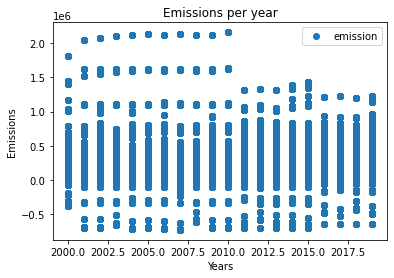

In [32]:
df2.plot (x="Year", y="emission", style="o")
plt.title("Emissions per year")
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.show()

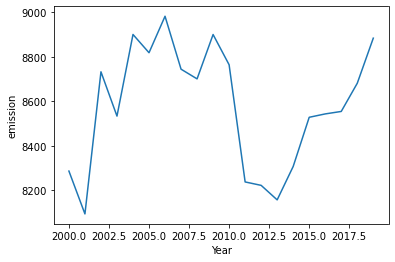

In [33]:
sns.lineplot(x=df2['Year'],y=df2['emission'], ci=None)
plt.savefig('emissionyears.png',dpi=200)
plt.show()

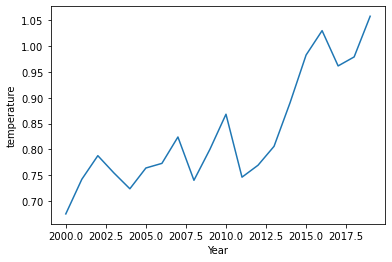

In [34]:
sns.lineplot(x=df2['Year'],y=df2['temperature'], ci=None)
plt.savefig('temperatureyears.png',dpi=200)
plt.show()

# 01. Regression of temperature vs CO2 emission

In [35]:
#define explanatory variable
X = CO2["emission"]

#define target variable
y = CO2["temperature"]

# add an intercept (beta_0) to the model
X = sm.add_constant(X) 

#fit linear regression model

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

C:\Users\Marce\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.554
Date:                Tue, 19 Oct 2021   Prob (F-statistic):             0.0757
Time:                        14:06:29   Log-Likelihood:                 17.889
No. Observations:                  20   AIC:                            -31.78
Df Residuals:                      18   BIC:                            -29.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1268      0.155      7.258      0.000       0.801       1.453
emission   -2.637e-05    1.4e-05     -1.885      0.076   -5.58e-05    3.02e-06
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.043
Skew:                           0.485   Prob(JB):                        0.594
Kurtosis:                       2.443   Cond. No.                     7.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

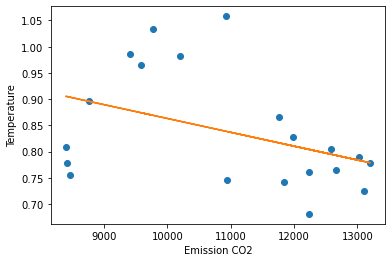

In [37]:
x = CO2['emission']

y = CO2['temperature']

# label axis
plt.xlabel('Emission CO2')
plt.ylabel('Temperature')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# Plot chart
plt.plot(x,y,'o')

# plot with regression line
plt.plot(x, m*x+b)

# save plot as png
plt.savefig('emission CO2.png',dpi=200)

# 02. Regression of temperature vs CH4 emission

In [38]:
#define explanatory variable
X = CH4["emission"]

#define target variable
y = CH4["temperature"]

# add an intercept (beta_0) to the model
X = sm.add_constant(X) 

#fit linear regression model

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

C:\Users\Marce\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     17.56
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           0.000549
Time:                        14:06:29   Log-Likelihood:                 22.855
No. Observations:                  20   AIC:                            -41.71
Df Residuals:                      18   BIC:                            -39.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0873      0.697     -2.996      0.008      -3.551      -0.623
emission       0.0002   4.33e-05      4.191      0.001    9.04e-05       0.000
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.593
Skew:                           0.043   Prob(JB):                        0.743
Kurtosis:                       2.161   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

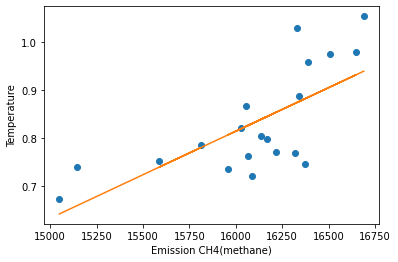

In [40]:
x = CH4['emission']

y = CH4['temperature']

# label axis
plt.xlabel('Emission CH4(methane)')
plt.ylabel('Temperature')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# Plot chart
plt.plot(x,y,'o')

# plot with regression line
plt.plot(x, m*x+b)

# save plot as png
plt.savefig('emission CH4.png',dpi=200)

# 03. Regression of temperature vs N2O

In [41]:
#define explanatory variable
X = N2O["emission"]

#define target variable
y = N2O["temperature"]

# add an intercept (beta_0) to the model
X = sm.add_constant(X) 

#fit linear regression model

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

C:\Users\Marce\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     27.10
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           5.95e-05
Time:                        14:06:29   Log-Likelihood:                 25.227
No. Observations:                  20   AIC:                            -46.45
Df Residuals:                      18   BIC:                            -44.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6086      0.277     -2.194      0.042      -1.191      -0.026
emission       0.0002   3.32e-05      5.206      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.471
Skew:                          -0.321   Prob(JB):                        0.790
Kurtosis:                       2.607   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

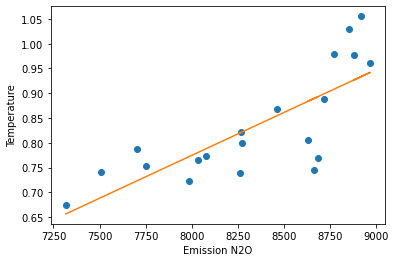

In [43]:
x = N2O['emission']

y = N2O['temperature']

# label axis
plt.xlabel('Emission N2O')
plt.ylabel('Temperature')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# Plot chart
plt.plot(x,y,'o')

# plot with regression line
plt.plot(x, m*x+b)

# save plot as png
plt.savefig('emission N2O.png',dpi=200)

# Following section is just to try out something new/different approach

In [44]:
df3=df2[['Year','temperature']].groupby('Year').mean()

In [45]:
df3.head()

,temperature
Year,
2000,0.675281
2001,0.742282
2002,0.787976
2003,0.754691
2004,0.723924


In [46]:
df3=df3.merge(CH4['emission'],on='Year')
df3.rename(columns={'emission':'CH4'},inplace=True)

In [47]:
df3.head()

,temperature,CH4
Year,,
2000,0.675281,15049.882173
2001,0.742282,15145.011218
2002,0.787976,15810.818754
2003,0.754691,15588.252022
2004,0.723924,16086.840658


In [48]:
df3=df3.merge(CO2['emission'],on='Year')
df3.rename(columns={'emission':'CO2'},inplace=True)

In [49]:
df3.head()

,temperature,CH4,CO2
Year,,,
2000,0.675281,15049.882173,12238.234018
2001,0.742282,15145.011218,10949.431180
2002,0.787976,15810.818754,13018.584071
2003,0.754691,15588.252022,12238.752860
2004,0.723924,16086.840658,13105.522569


In [50]:
df3=df3.merge(N2O['emission'],on='Year')
df3.rename(columns={'emission':'N2O'},inplace=True)

In [51]:
df3.head()

,temperature,CH4,CO2,N2O
Year,,,,
2000,0.675281,15049.882173,12238.234018,7316.777503
2001,0.742282,15145.011218,10949.431180,7506.319104
2002,0.787976,15810.818754,13018.584071,7704.619815
2003,0.754691,15588.252022,12238.752860,7750.504686
2004,0.723924,16086.840658,13105.522569,7987.294222


C:\Users\Marce\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


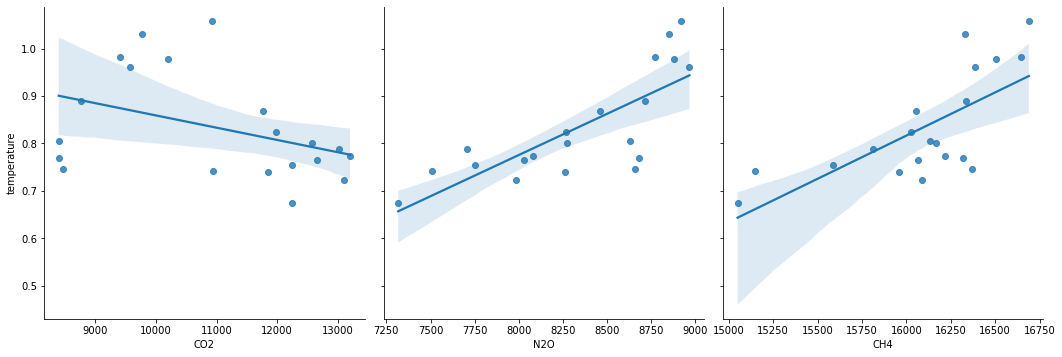

In [52]:
sns.pairplot(df3, x_vars=['CO2','N2O','CH4'],y_vars='temperature',kind='reg', size=5)
plt.savefig('allinone regression.png', dpi=200)